# Melbourne Property Analysis

#### Here I am analysig data gathered from public sources showing real estate transactions in Melbourne. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Firstly lets read the file into a dataframe

In [2]:
melb = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Generation Course Content\github\Datasets\melbourne_data.csv')
melb.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
0,Abbotsford,68 Studley St,2,h,NaN,SS,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan


### Data cleaning and Removing outliers

#### Removing all rows where price is not known

In [3]:
#remove all rows where price is not known
melb1 = melb.dropna(subset=['price'])
melb1.head()


,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
1,Abbotsford,85 Turner St,2,h,1480000.0,S,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,40 Federation La,3,h,850000.0,PI,4/03/2017,2.5,3067.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan


#### Remove all rows where building area is not known

In [4]:
melb1 = melb1.dropna(subset=['building_area'])
melb1.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,7/05/2016,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,8/10/2016,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


##### Cleaning the data using Building area and assuming a lower and upper bound

First, I'll check all the listings for houses and units where the building area is listed as 0. It's clear that a house or a unit can't have a building area of 0, so these listings are not accurate.

Next, I'll identify properties with very big building areas. I think anything above 1000 square meters might not be a normal size for a regular home. While mansions can be large, sizes beyond 1000 square meters are probably not common for typical homes.

In [5]:
# Counting the no. of records in the 'building area' column
print("Total no. of records:", len(melb1['building_area']))

# Count of records where building_area is 0
print("Total no. of records where building_area is 0:",len( melb1[melb1['building_area'] == 0] ))

# Count of records where building_area is greater than 0
print("Total no. of records where building_area is greater than 0:", len(melb1[melb1['building_area'] > 0]))

# Count of records where building_area is greater than 1000
print("Total no. of records where building_area is greater than 1000:", len(melb1[melb1['building_area'] > 1000]))


Total no. of records: 10656
Total no. of records where building_area is 0: 61
Total no. of records where building_area is greater than 0: 10595
Total no. of records where building_area is greater than 1000: 9


Now, I'm selecting the records where the building area is between 10 and 1000 square meters.

In [6]:
# Count of records where building_area is less than 10
print("Total no. of records where building_area is less than 10:",len( melb1[melb1['building_area'] < 10] ))
# Count of records where building_area is between 10 and 1000
melb2= melb1[(melb1['building_area'] >10) & (melb1['building_area'] < 1000)]
print("Total no. of records where building_area is between 10 and 1000:", len( melb2['building_area']))


Total no. of records where building_area is less than 10: 125
Total no. of records where building_area is between 10 and 1000: 10521


Here I'm doing a quick scatter plot to see any further outliers in terms of building area.

<AxesSubplot:xlabel='building_area', ylabel='price'>

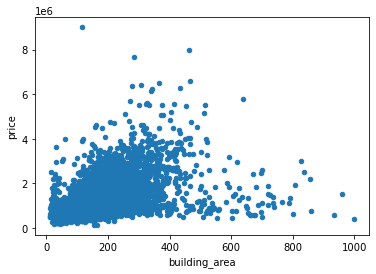

In [7]:
melb2.plot(x='building_area', y='price', kind='scatter' )


The scatter plot shows that many properties sold have a building area less than 400 square meters. It's surprising that even when the building area increases, the price doesn't always go up, which is not what we'd expect. The most expensive property isn't very big, and the property with the biggest area costs less than 1M dollars. 

#### Convert the date column to the pandas datetime type

In [8]:
melb2['date'] = pd.to_datetime(melb2['date'])

#Create year (to be used later)
melb2['sale_year'] = melb2['date'].dt.year

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/09/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/03/2017' in DD/MM/YYYY format. Provide format or specif

C:\Users\Admin\AppData\Local\Temp\ipykernel_12716\3917579899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb2['date'] = pd.to_datetime(melb2['date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_12716\3917579899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb2['sale_year'] = melb2['date'].dt.year


In [49]:
melb2.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region,sale_year
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,2017
6,Abbotsford,55a Park St,4,h,1600000.0,VB,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,2016
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,2016-07-05,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,2016
14,Abbotsford,98 Charles St,2,h,1636000.0,S,2016-08-10,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,2016


In [50]:
melb2.dtypes

suburb                   object
address                  object
bedrooms                  int64
type                     object
price                   float64
method                   object
date             datetime64[ns]
distance                float64
postcode                float64
bathrooms               float64
car                     float64
land_size               float64
building_area           float64
year_built              float64
council_area             object
latitude                float64
longtitude              float64
region                   object
sale_year                 int64
dtype: object

#### Other Cleaning

##### Removing all houses where land size is 0

In [51]:
print("Land size equal to 0: ",len( melb2[melb2.land_size== 0]))
print( "Houses with land size equal to 0:" ,len( melb2[(melb2.land_size== 0) & (melb2.type == 'h')] ))

Land size equal to 0:  1050
Houses with land size equal to 0: 81


In [52]:
# Check and remove all rows where land size is 0
melb3 = melb2.drop( melb2.index[(melb2['type'] == 'h') & (melb2['land_size'] == 0)] )                
melb3.head()

,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region,sale_year
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,2016
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,2017
6,Abbotsford,55a Park St,4,h,1600000.0,VB,2016-04-06,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,2016
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,2016-07-05,2.5,3067.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,2016
14,Abbotsford,98 Charles St,2,h,1636000.0,S,2016-08-10,2.5,3067.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,2016


##### Check for all properties where number of rooms is 0

In [53]:
print( len( melb3[(melb3.bedrooms == 0)] ))

0


##### Check for price < 100K

In [54]:
print( len( melb3[(melb3['price'] < 100000)] ))

0


### Analysis on number of Properties Sold by Year

sale_year
2016    3512
2017    5699
2018    1229
Name: price, dtype: int64


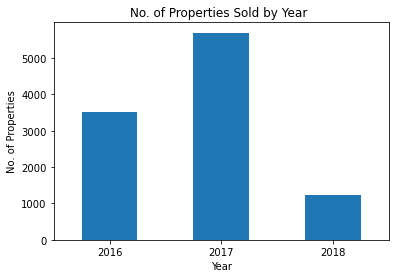

In [71]:
grouped_data = melb3.groupby(['sale_year'])['price'].count()
print(grouped_data)
grouped_data.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No. of Properties')
plt.title('No. of Properties Sold by Year ')
plt.xticks(rotation=0)
plt.show()

Looking at the bar graph, we notice a significant rise in property sales during 2017 when compared to the previous year. This suggests the demand in property market increased from 2016 and 2017. 2018 may not be showing full year data which is why the number of properties sold is unrealistically low.

### Analysis on number of Units, Houses and Townhouses Sold

type
h    7783
t     884
u    1773
Name: price, dtype: int64


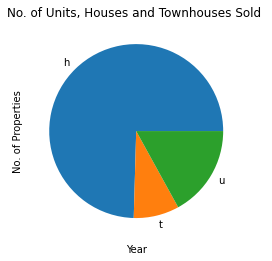

In [72]:
grouped_data = melb3.groupby(['type'])['price'].count()
print(grouped_data)
grouped_data.plot(kind='pie')
plt.xlabel('Year')
plt.ylabel('No. of Properties')
plt.title('No. of Units, Houses and Townhouses Sold ')
plt.xticks(rotation=0)
plt.show()

Looking at the pie chart, it's clear that houses had the highest sales, followed by units, and then townhouses. This suggests that houses were the most popular choice among buyers, with units being the second most preferred option. Townhouses, on the other hand, had comparatively fewer sales. This indicates that people generally prefer houses and units over townhouses.

### Analysis using number of bedrooms

In [62]:
# Function to determine bedroom range based on number of bedrooms
def determine_bedroom_range(bedrooms):
    if bedrooms == 1:
        return '1 Bed'
    elif bedrooms == 2:
        return '2 Bed'
    elif bedrooms == 3:
        return '3 Bed'
    elif bedrooms == 4:
        return '4 Bed'
    else:
        return '5+ Bed'

# Apply the function to create the new column 'Bedroom_Range'
melb3['Bedroom_Range'] = melb3['bedrooms'].apply(determine_bedroom_range)

print(melb3[['Bedroom_Range', 'bedrooms','price','sale_year','type']].head())

   Bedroom_Range  bedrooms      price  sale_year type
2          2 Bed         2  1035000.0       2016    h
4          3 Bed         3  1465000.0       2017    h
6          4 Bed         4  1600000.0       2016    h
11         3 Bed         3  1876000.0       2016    h
14         2 Bed         2  1636000.0       2016    h


#### Number of properties sold by Bedrooms

Bedroom_Range
1 Bed      389
2 Bed     2197
3 Bed     4510
4 Bed     2672
5+ Bed     672
Name: price, dtype: int64


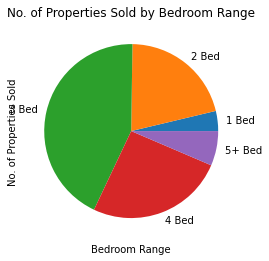

In [74]:
grouped_data = melb3.groupby('Bedroom_Range')['price'].count()
print(grouped_data)
grouped_data.plot(kind='pie')
plt.xlabel('Bedroom Range')
plt.ylabel('No. of Properties Sold')
plt.title('No. of Properties Sold by Bedroom Range')
plt.xticks(rotation=0)
plt.show()

Looking at the pie chart, we clearly notice that 1-bedroom properties have relatively low sales indicating less demand. 3-bedroom properties are showing high demand. 5-bedroom properties on the other hand comparatively had fewer sales, this is probably due to the availability or most buyers not being able to afford them.

#### Number of properties sold by Bedrooms and property type for 2017

In [64]:
# Filter data for the year 2018
melb_2017 = melb3[melb3['sale_year'] == 2017]

melb_2017.head()



,suburb,address,bedrooms,type,price,method,date,distance,postcode,bathrooms,car,land_size,building_area,year_built,council_area,latitude,longtitude,region,sale_year,Bedroom_Range
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,2017,3 Bed
38,Abbotsford,3/72 Charles St,4,h,1330000.0,PI,2017-03-18,2.5,3067.0,2.0,2.0,780.0,135.0,1900.0,Yarra City Council,-37.8073,144.9952,Northern Metropolitan,2017,4 Bed
41,Abbotsford,138/56 Nicholson St,3,u,1090000.0,S,2017-03-18,2.5,3067.0,2.0,2.0,4290.0,27.0,NaN,Yarra City Council,-37.8078,144.9965,Northern Metropolitan,2017,3 Bed
55,Abbotsford,166 Gipps St,3,h,1290000.0,S,2017-02-25,2.5,3067.0,2.0,2.0,147.0,18.0,NaN,Yarra City Council,-37.8050,144.9943,Northern Metropolitan,2017,3 Bed
56,Abbotsford,60 Stafford St,3,h,1290000.0,S,2017-02-25,2.5,3067.0,1.0,1.0,168.0,124.0,1950.0,Yarra City Council,-37.8007,144.9958,Northern Metropolitan,2017,3 Bed


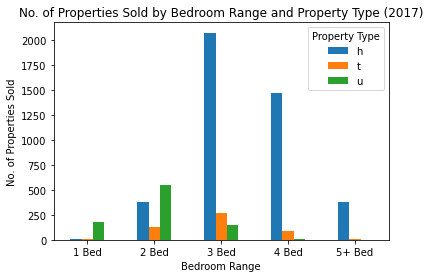

In [66]:
# Group by 'Bedroom_Range' and 'property_type' and count the number of properties sold
grouped_data = melb_2017.groupby(['Bedroom_Range', 'type'])['price'].count().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Bedroom Range')
plt.ylabel('No. of Properties Sold')
plt.title('No. of Properties Sold by Bedroom Range and Property Type (2017)')
plt.legend(title='Property Type')
plt.xticks(rotation=0)
plt.show()

From the above graph we can see, houses are the popular choice with 3 bedroom and 4 bedroom houses being most in demand. In Units,2 bedroom are the popular choice followed by 1 bedroom. Townhouses are the least popular choice and 3 bedroom townhouses are the most sold among townhouses. 

#### Average price of units, houses and townhouses by Bedrooms for 2017

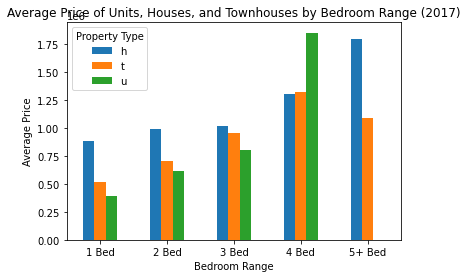

In [67]:
# Group by 'Bedroom_Range' and 'property_type' and calculate the mean price
grouped_data = melb_2017.groupby(['Bedroom_Range', 'type'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Bedroom Range')
plt.ylabel('Average Price')
plt.title('Average Price of Units, Houses, and Townhouses by Bedroom Range (2017)')
plt.legend(title='Property Type')
plt.xticks(rotation=0)
plt.show()

There is not much price difference between 3 bedroom houses, townhouses and units. This explains 3 bedroom houses being a popular choice. 4 bedroom units average price appears skewed due to less volume and possibly 1 or 2 luxury units priced in millions. It is unlikely for unit price to be higher than the house.

#### Average price of units, houses and townhouses by Bedrooms and year  

#### For Units

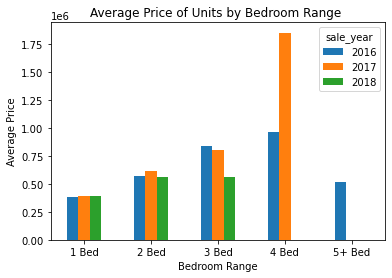

In [32]:
# Filter data for the year and property type 'u' (units)
melb_units= melb3[melb3['type'] == 'u']

# Group by 'Bedroom_Range' and calculate the mean price
grouped_data = melb_units.groupby(['Bedroom_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Bedroom Range')
plt.ylabel('Average Price')
plt.title('Average Price of Units by Bedroom Range ')
plt.xticks(rotation=0)
plt.show()

Average price of 3 bedroom units apperars to be dropping, making them a poor choice of investment. 2 bedroom and 1 bedroom units are more steady in their pricing. The price for 4 bedroom units is again skewed due to an outlier.

#### For Houses

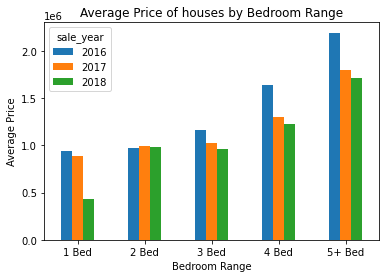

In [69]:
# Filter data for the year and property type 'h' (houses)
melb_houses = melb3[melb3['type'] == 'h']

# Group by 'Bedroom_Range' and calculate the mean price
grouped_data = melb_houses.groupby(['Bedroom_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Bedroom Range')
plt.ylabel('Average Price')
plt.title('Average Price of houses by Bedroom Range')
plt.xticks(rotation=0)
plt.show()

2 bedroom properties have remained steady in pricing from 2016 to 2018. There has been a slight drop in pricing for 3 bedroom houses which form the majority and show us the realistic trend of the market. 4 bedroom and 5 bedroom properties have shown a significant drop from 2016 to 2017 but this may be due to limited properties on the market.

#### For Townhouses

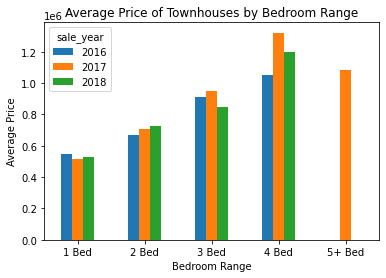

In [75]:
# Filter data for the year and property type 't' (townhouses)
melb_town = melb3[melb3['type'] == 't']

# Group by 'Bedroom_Range' and calculate the mean price
grouped_data = melb_town.groupby(['Bedroom_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Bedroom Range')
plt.ylabel('Average Price')
plt.title('Average Price of Townhouses by Bedroom Range')
plt.xticks(rotation=0)
plt.show()

Townhouses are only a minor proportion of the properties sold and cannot provide an accurate reflection of the market. However we do see a slight increase in 2 bedroom townhouse pricing. 3 bedrooms are showing increase from 2016 to 2017 but drop in 2018.
4 Bedroom townhouses show a bigger increase from 2016 to 2017 but the volume is too low which may skew the result.

### Analysis using distance from CBD

In [93]:
##### Function to determine distance range based on number of distance
def determine_distance_range(distance):
    if distance <= 5:
        return '00-05 kms'
    elif distance <= 10:
        return '06-10 kms'
    elif distance <= 20:
        return '10-20 kms'
    else:
        return '20+ kms'
    
# Apply the function to create the new column 'distance_Range'
melb3['distance_Range'] = melb3['distance'].apply(determine_distance_range)

print(melb3[['distance_Range', 'distance','price','sale_year','type']].head())

   distance_Range  distance      price  sale_year type
2       00-05 kms       2.5  1035000.0       2016    h
4       00-05 kms       2.5  1465000.0       2017    h
6       00-05 kms       2.5  1600000.0       2016    h
11      00-05 kms       2.5  1876000.0       2016    h
14      00-05 kms       2.5  1636000.0       2016    h


#### Number of properties sold by distance 

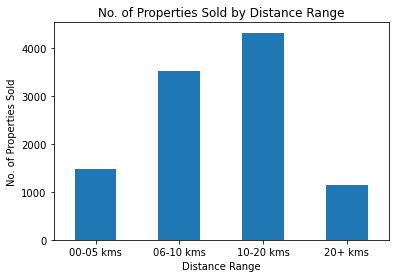

In [94]:
grouped_data = melb3.groupby('distance_Range')['price'].count()
grouped_data.plot(kind='bar')
plt.xlabel('Distance Range')
plt.ylabel('No. of Properties Sold')
plt.title('No. of Properties Sold by Distance Range')
plt.xticks(rotation=0)
plt.show()

Most properties sold are within 20kms to cbd. 

#### Number of properties sold by distance and property type for 2018

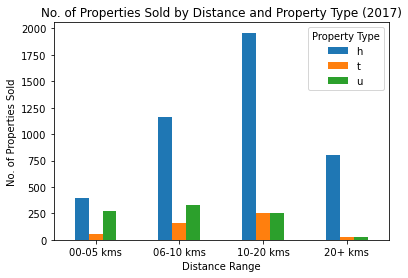

In [95]:
# Filter data for the year 2017
melb_2017 = melb3[melb3['sale_year'] == 2017]

# Group by 'distance_Range' and 'property_type' and count the number of properties sold
grouped_data = melb_2017.groupby(['distance_Range', 'type'])['price'].count().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Distance Range')
plt.ylabel('No. of Properties Sold')
plt.title('No. of Properties Sold by Distance and Property Type (2017)')
plt.legend(title='Property Type')
plt.xticks(rotation=0)
plt.show()

Majority of houses sold are from 10-20km range which is similar for townhouses. Most units sold are within 10Kms from the city.

#### Average price of units, houses and townhouses by distance for 2017

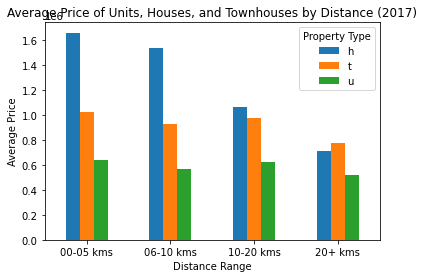

In [96]:
# Group by 'distance_Range' and 'property_type' and calculate the mean price
grouped_data = melb_2017.groupby(['distance_Range', 'type'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Distance Range')
plt.ylabel('Average Price')
plt.title('Average Price of Units, Houses, and Townhouses by Distance (2017)')
plt.legend(title='Property Type')
plt.xticks(rotation=0)
plt.show()

The above graph shows that as we move further out from cbd the house prices keep dropping. However this is not the case for units and townhouses.

#### Average price of units, houses and townhouses by distance and year

#### For Units

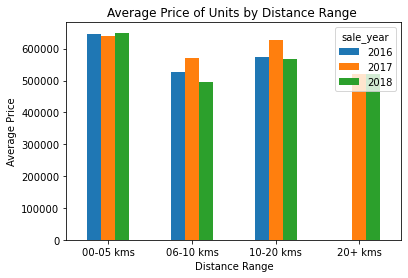

In [97]:
# Filter data for the year and property type 'u' (units)
melb_units= melb3[melb3['type'] == 'u']

# Group by 'Bedroom_Range' and calculate the mean price
grouped_data = melb_units.groupby(['distance_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Distance Range')
plt.ylabel('Average Price')
plt.title('Average Price of Units by Distance Range ')
plt.xticks(rotation=0)
plt.show()

Units prices in CBD have remained steady where as unit prices from 6-20km range have increased from 2016 to 2017 but dropped in 2018, this drop may be due to not having a complete year view of 2018.

#### For Houses

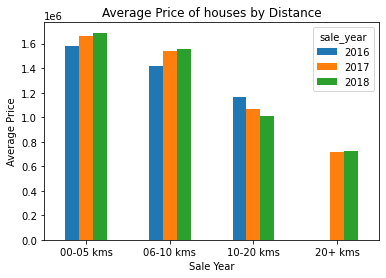

In [98]:
melb_houses = melb3[melb3['type'] == 'h']

# Group by 'distance_Range' and calculate the mean price
grouped_data = melb_houses.groupby(['distance_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Sale Year')
plt.ylabel('Average Price')
plt.title('Average Price of houses by Distance')
plt.xticks(rotation=0)
plt.show()

House prices for houses within 10Kms from cbd are showing slight increase from 2016 to 2018. Where as houses 10Km and further from CBD are experiencing a dip. There's not enough data to comment on properties 20km and further from CBD.

#### For TownHouses

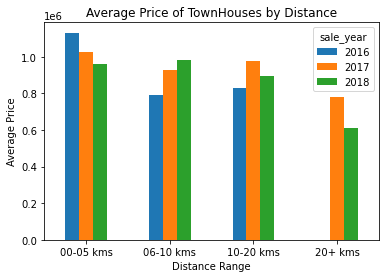

In [99]:
# Filter data for the year and property type 't' (townhouses)
melb_town = melb3[melb3['type'] == 't']

# Group by 'distance_Range' and calculate the mean price
grouped_data = melb_town.groupby(['distance_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Distance Range')
plt.ylabel('Average Price')
plt.title('Average Price of TownHouses by Distance')
plt.xticks(rotation=0)
plt.show()

Townhouses are smaller proportion of property sales and donot show a specific trend with distance. We notice a drop in pricing for properties within 5 kms from cbd but see an increase for properties within 10kms from cbd.

### Analysis using building area

In [108]:
##### Function to determine building area range based on range of building area
def building_area_range(building_area):
    if building_area <= 100:
        return '< 100'
    elif building_area <= 200:
        return '< 200'
    elif building_area <= 400:
        return '< 400'
    elif building_area <= 600:
        return '< 600'
    elif building_area <= 800:
        return '< 800'
    else:
        return '> 900 '
    
# Apply the function to create the new column 'distance_Range'
melb3['building_Range'] = melb3['building_area'].apply(building_area_range)

print(melb3[['building_Range', 'building_area','price','sale_year','type']].head())

   building_Range  building_area      price  sale_year type
2           < 100           79.0  1035000.0       2016    h
4           < 200          150.0  1465000.0       2017    h
6           < 200          142.0  1600000.0       2016    h
11          < 400          210.0  1876000.0       2016    h
14          < 200          107.0  1636000.0       2016    h


#### Number of properties sold by Building area

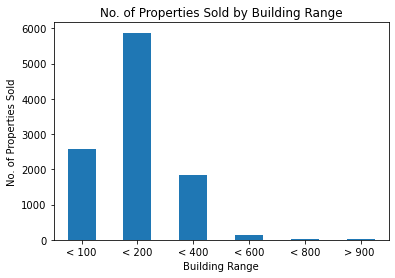

In [109]:
grouped_data = melb3.groupby('building_Range')['price'].count()
grouped_data.plot(kind='bar')
plt.xlabel('Building Range')
plt.ylabel('No. of Properties Sold')
plt.title('No. of Properties Sold by Building Range')
plt.xticks(rotation=0)
plt.show()

#### Number of properties sold by Building area and property type for 2018

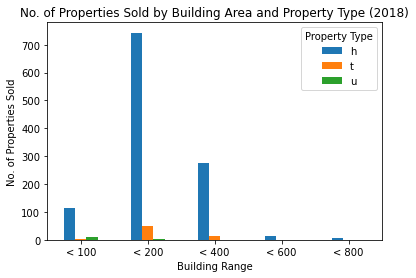

In [110]:
# Filter data for the year 2018
melb_2018 = melb3[melb3['sale_year'] == 2018]

# Group by 'building range' and 'property_type' and count the number of properties sold
grouped_data = melb_2018.groupby(['building_Range', 'type'])['price'].count().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Building Range')
plt.ylabel('No. of Properties Sold')
plt.title('No. of Properties Sold by Building Area and Property Type (2018)')
plt.legend(title='Property Type')
plt.xticks(rotation=0)
plt.show()

#### Average price of units, houses and townhouses by Building area for 2018

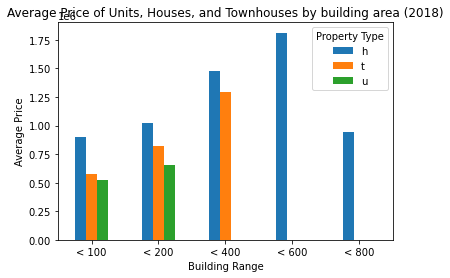

In [111]:
# Group by 'building_Range' and 'property_type' and calculate the mean price
grouped_data = melb_2018.groupby(['building_Range', 'type'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Building Range')
plt.ylabel('Average Price')
plt.title('Average Price of Units, Houses, and Townhouses by building area (2018)')
plt.legend(title='Property Type')
plt.xticks(rotation=0)
plt.show()

#### Average price of units, houses and townhouses by Building area and year   

#### For Units

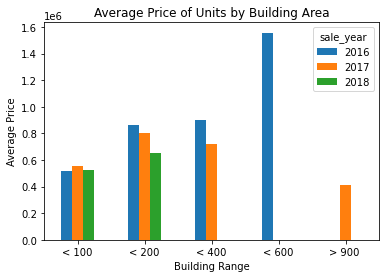

In [112]:
# Filter data for the year and property type 'u' (units)
melb_units= melb3[melb3['type'] == 'u']

# Group by 'building_Range' and calculate the mean price
grouped_data = melb_units.groupby(['building_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Building Range')
plt.ylabel('Average Price')
plt.title('Average Price of Units by Building Area')
plt.xticks(rotation=0)
plt.show()

#### For Houses

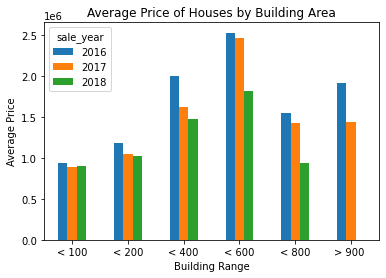

In [116]:
melb_houses= melb3[melb3['type'] == 'h']

    # Group by 'building_Range' and calculate the mean price
grouped_data = melb_houses.groupby(['building_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Building Range')
plt.ylabel('Average Price')
plt.title('Average Price of Houses by Building Area')
plt.xticks(rotation=0)
plt.show()

#### For Townhouses

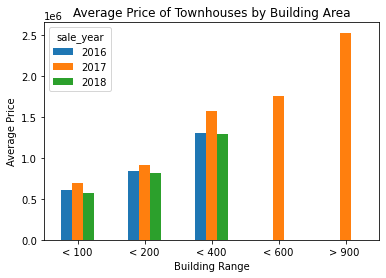

In [117]:
melb_town= melb3[melb3['type'] == 't']

# Group by 'building_Range' and calculate the mean price
grouped_data = melb_town.groupby(['building_Range','sale_year'])['price'].mean().unstack()

# Create the bar plot
grouped_data.plot(kind='bar')
plt.xlabel('Building Range')
plt.ylabel('Average Price')
plt.title('Average Price of Townhouses by Building Area')
plt.xticks(rotation=0)
plt.show()